In [1]:
data_file_in = "data/recording_64.wav" # <--- CHANGE THIS!!

In [2]:
from receiver import receiver
import matplotlib.pyplot as plt

Chirp_p_s Prefix Length: 1024
Chirp_p_s Suffix Length: 1024
Chirp_p_s Length: 67568
Sample rate (wav) =  48000


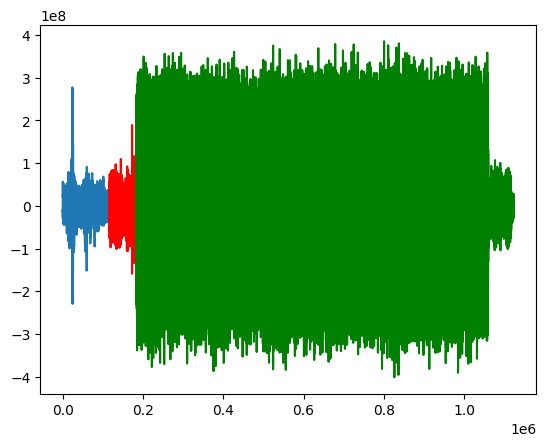

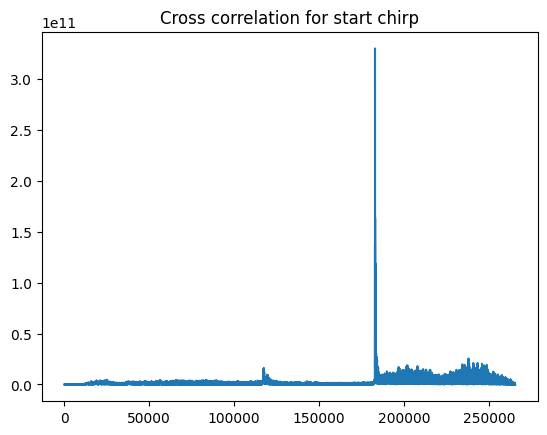

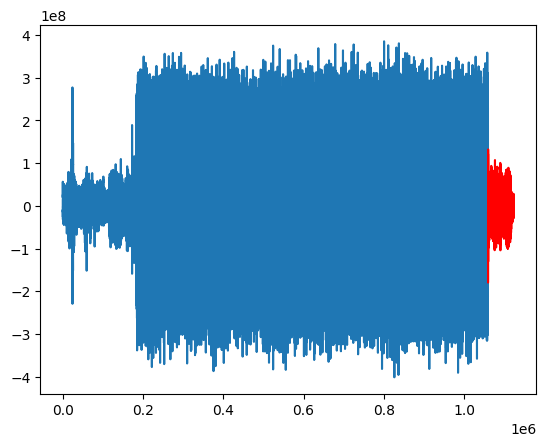

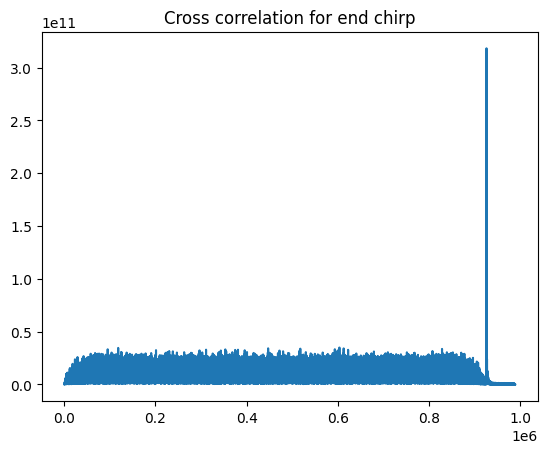

In [3]:
r = receiver()

# entire_data = np.loadtxt('data/benson_testing1.csv', delimiter = ",", dtype = "float")

entire_data = r.read_wav("data/recording_64.wav")

### FIND CROSS CORRELATIONS (start and end chirps)

start_index, cross_correlation = r.find_start_index(entire_data)

plt.plot(cross_correlation)
plt.title("Cross correlation for start chirp")
plt.show()

end_index, cross_correlation = r.find_start_index(entire_data, position = "end")

plt.plot(cross_correlation)
plt.title("Cross correlation for end chirp")
plt.show()


In [4]:
### FIND LENGTH AND SEPERATE DATA BLOCK

end_index = end_index - r.ofdm_prefix_size # ???
data_index = r.find_data_index(entire_data, start_index)
data_length = end_index - data_index

print("Data Length:", data_length)

num_symbols = data_length // (r.ofdm_symbol_size + r.ofdm_prefix_size) # Floor division may mean that we loose some data at the end?
data_block = entire_data[data_index : data_index + (num_symbols) * (r.ofdm_symbol_size + r.ofdm_prefix_size)]

r.bits = int(num_symbols * r.c.K)
print("Bits:", r.bits)

data = r.data_block_processing(data_block)

print("Data: ", data[0:100])
print(r.decode_text(data)[0:100])

data_without_header = r.extract_header(data)
r.save_decoded_file(data_without_header, r.bits)

Data Length: 875530
Bits: 110808
Len of Data_block: 875520
Number of OFDM Symbols: 171
[ 1.00000000e+00+0.00000000e+00j -4.51775209e+09-8.80083093e+08j
  1.30632420e+10+6.23950906e+08j ... -1.88004633e+10-8.10612753e+09j
  1.30632420e+10-6.23950906e+08j -4.51775209e+09+8.80083093e+08j]
Ideal [[ 0.00000000e+00+0.00000000e+00j  6.67406868e+09-2.53426423e+09j
   4.58865809e+09+1.76350616e+09j ... -1.00701615e+10+5.44729479e+09j
   4.58865809e+09-1.76350616e+09j  6.67406868e+09+2.53426423e+09j]
 [ 0.00000000e+00+0.00000000e+00j  6.67406868e+09-2.53426423e+09j
   4.58865809e+09+1.76350616e+09j ... -1.00701615e+10+5.44729479e+09j
   4.58865809e+09-1.76350616e+09j  6.67406868e+09+2.53426423e+09j]
 [ 0.00000000e+00+0.00000000e+00j  6.67406868e+09-2.53426423e+09j
   4.58865809e+09+1.76350616e+09j ... -1.00701615e+10+5.44729479e+09j
   4.58865809e+09-1.76350616e+09j  6.67406868e+09+2.53426423e+09j]
 [ 0.00000000e+00+0.00000000e+00j  6.67406868e+09-2.53426423e+09j
   4.58865809e+09+1.76350616e+09